<a href="https://colab.research.google.com/github/Subhashree-Ojha/Prediction_using_Supervised_ML/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Supervised ML**

In [ ]:
#Import all liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline

**Get the Dataset**

In [ ]:
#reading data from CSV
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('students details imported succesfully')
df.head()

students details imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Data Exploration**

In [ ]:
#display number of rows and columns
df.shape

(25, 2)

In [ ]:
#display consise sumary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#chcecking for any null data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#statistical details
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


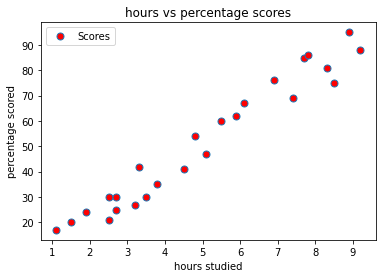

In [ ]:
#visualisation
df.plot(x='Hours',y='Scores', style='o',markerfacecolor='red', markersize='7')
plt.title("hours vs percentage scores")
plt.xlabel("hours studied")
plt.ylabel("percentage scored")
plt.show()

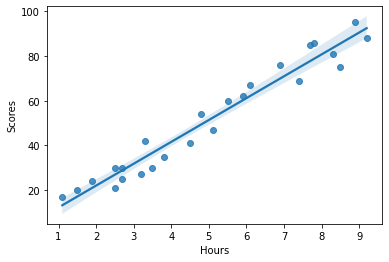

In [ ]:
#regression plot 
sns.regplot(x=df['Hours'],y=df['Scores']);

**Data Pre-processing**

In [ ]:
x=df[['Hours']]
y=df[['Scores']]

In [ ]:
from sklearn.model_selection import train_test_split
train_x,val_x, train_y,val_y=train_test_split(x,y,random_state=0)

**Model Selection**

In [ ]:
#train our algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(train_x,train_y)
print("training comleted")

training comleted


**Predicted Value and Real Value Comparison**

In [ ]:
#prediction
pred_y=regressor.predict(val_x)


#view actual and predictd on test set
pd.DataFrame([{'Actual':val_y,'Predicted':pred_y}])

,Actual,Predicted
0,Scores 5 20 2 27 19 69 16...,"[[16.844721762383802], [33.74557493951356], [7..."


In [ ]:
#print accuracy 
print("accuracy=",regressor.score(val_x,val_y)*100)

accuracy= 93.67661043365057


**Visualization of actual and predicted data**

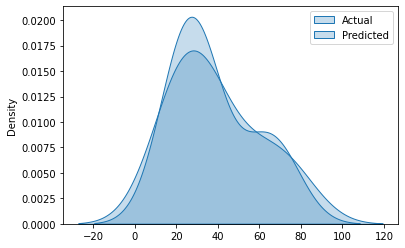

In [ ]:
sns.kdeplot(data=val_y,label="Actual",shade=True);
sns.kdeplot(data=pred_y,label="Predicted",shade=True);
plt.legend()

Predicted values are not exactly same with actual values, but have more or less same distibution. So error can't be count.

In [ ]:
#checking train and test accuracy
print("Training Score", regressor.score(train_x,train_y)*100)
print("Testing Score", regressor.score(val_x,val_y)*100)

Training Score 94.84509249326872
Testing Score 93.67661043365057


The training and testing values are close. So the model is working fine.

In [ ]:
#what will be the predicted score if a student study for 9.25 hours:
h=[[9.25]]
s=regressor.predict(h)

print("predicted score=",s[0])

predicted score= [93.89272889]


**Evaluating the model**

In [ ]:
from sklearn import metrics
print("mean absolute error=", metrics.mean_absolute_error(val_y,pred_y))
print("max error=", metrics.max_error(val_y,pred_y))
print("mean squared error=", metrics.mean_squared_error(val_y,pred_y))

mean absolute error= 4.130879918502482
max error= 6.74557493951356
mean squared error= 20.33292367497996
